In [532]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import math

In [533]:
#Preparing dataset for processing
X_train = np.loadtxt('./q3/logisticX.csv',delimiter=',')
Y_train = np.loadtxt('./q3/logisticY.csv')
Y_train = Y_train.reshape(len(Y_train),1)
theta = np.zeros((3,1))

#Keep copies before normalisation step

X_copy = X_train
Y_copy = Y_train

#Normalise values

M = len(X_train)

X_train = (X_train - np.mean(X_train)) / (np.max(X_train) - np.mean(X_train))
X_train = np.hstack((np.reshape(np.ones(M), (M, 1)), X_train))

# print(theta)
# print(X_train)

In [534]:
def sigmoid(array):
    
    for i in range(len(array)):
#        print("entered")
#         print(array[i][0])
        array[i][0] = 1/(1+np.exp(array[i]))
    return array

# sigmoid([[1],[2]])

In [535]:
def cost_func(X,Y,Theta):
    mul = np.dot(X,Theta)
    activ = sigmoid(mul)

    cost = -1*np.sum(Y*np.log(activ) + (1-Y)*np.log(1-activ))
#     print(cost)
    return cost

# cost_func(X_train,Y_train,theta)

In [536]:
def derivative(X,Y,Theta,count):
    #derivative for one sample, have to sum it over m samples
    i_dash = 0
    
    if count<(M+1):
#         print("Entered 1")
        mul = np.dot(X,Theta)
#         print("Mul ",mul)
        activ = sigmoid(mul)
#         print("Activ ",activ)
        dif = Y-activ
        return np.dot(X.T,dif)
    else:
#         print("Entered 2")
        return -1
    
derivative(X_train,Y_train,theta,1)

array([[  0.        ],
       [ 11.60909427],
       [-12.3132807 ]])

In [537]:
def hessian(X,Y,Theta):
    mul = np.dot(X,Theta)
    activ = sigmoid(mul)
    hes = np.dot(np.dot(X.T,np.diag((activ*(1-activ)).reshape(-1,))),X)
    return hes

hessian(X_train,Y_train,theta) 

array([[25.        ,  0.31164265, -0.31164265],
       [ 0.31164265,  2.94627644, -1.53829628],
       [-0.31164265, -1.53829628,  3.2586181 ]])

In [538]:
count = 0

while(count<10):
    mul = np.dot(X_train,theta)
#     print(theta)
#     print(X_train[53])

    activ = sigmoid(mul)
    
#     print(activ)

    #Y-sigmoid(Theta(T).X)
    dif = Y_train-activ
    
    hes = hessian(X_train,Y_train,theta)
#     print(hes)
#     print(derivative(X_train,Y_train,theta,count))
#     print(np.linalg.pinv(hes))
    
#     print(np.dot(np.linalg.pinv(hes),derivative(X_train,Y_train,theta,count)))
#     print(np.dot(X_train.T,dif))
    theta = theta - np.dot(np.linalg.pinv(hes),np.dot(X_train.T,dif))
        
    #Theta now updated, calculate params again
    
#     print(cost_func(X_train, Y_train, theta))
    count+=1

print("Final Cost ", cost_func(X_train, Y_train, theta))
print("Final value of Theta ",theta)
    

Final Cost  22.83414498447239
Final value of Theta  [[-0.2130308 ]
 [-7.54529007]
 [ 7.55392363]]


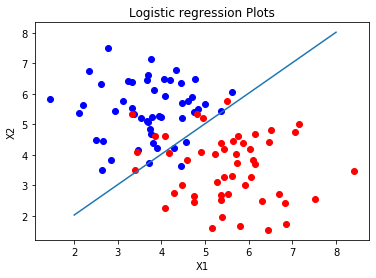

In [540]:
#Separate Labels by values


index_0 = []
index_1 = []
X1_0 = []
X1_1 = []
X2_0 = []
X2_1 = []

for i in range(len(X_train)):
    if Y_copy[i]==0:
        index_0.append(i)
    else:
        index_1.append(i)
        
X_line = [2,8]
#using separator equation
Y_line = -1*(theta[0] + theta[1]*X_line)/theta[2]

# print(X_line)
# print(Y_line)

        
# print(index_0)

for num in index_0:
    X1_0.append(X_copy[num][0])
    X2_0.append(X_copy[num][1])
    
for num in index_1:
    X1_1.append(X_copy[num][0])
    X2_1.append(X_copy[num][1])
    
plt.figure(1)
plt.title("Logistic regression Plots")
plt.plot(X1_0,X2_0,'bo')
plt.plot(X1_1,X2_1,'ro')


plt.plot(X_line,Y_line)


plt.xlabel('X1')
plt.ylabel('X2')

plt.show()
plt.close()